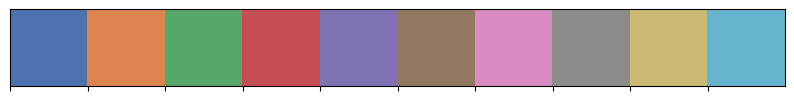

In [ ]:
import seaborn as sns
palette1 = sns.color_palette("deep")
sns.palplot(palette1)

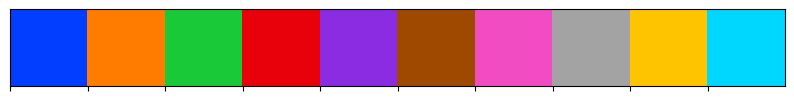

In [ ]:
palette3 = sns.color_palette("bright")
sns.palplot(palette3)

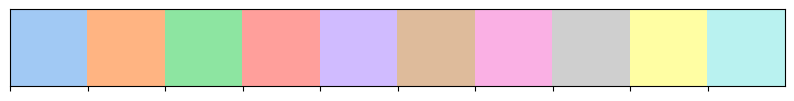

In [ ]:
palette4 = sns.color_palette("pastel")
sns.palplot(palette4)

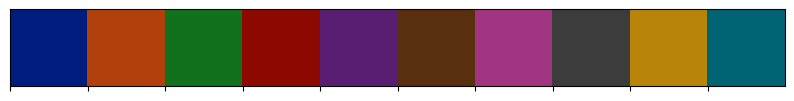

In [ ]:
palette5 = sns.color_palette("dark")
sns.palplot(palette5)

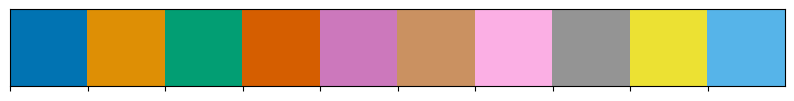

In [ ]:
palette6 = sns.color_palette("colorblind")
sns.palplot(palette6)

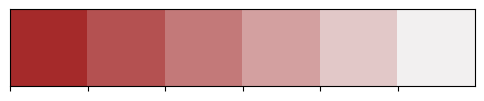

In [ ]:
custom_palette3 = sns.light_palette("brown", reverse=True)
sns.palplot(custom_palette3)

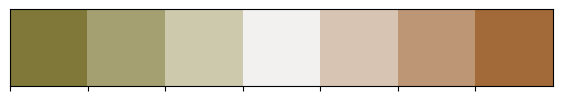

In [ ]:
custom_palette5 = sns.diverging_palette(440, 40, n=7)
sns.palplot(custom_palette5)

##Задание 1
Использование тепловых карт для поиска шаблонов в данных о
больных диабетом. В этом задании мы будем использовать тепловую карту, чтобы найти закономерности в данных о больных диабетом:
1. С помощью pandas считывать данные, расположенные в подкаталоге.
2. Используйте тепловую карту для визуализации данных.
3. Используйте собственную цветную карту. Убедитесь, что наименьшее
значение - самый темный цвет, а наибольшее - самый яркий.

Первые строки данных:
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  
0           never  27.32          5

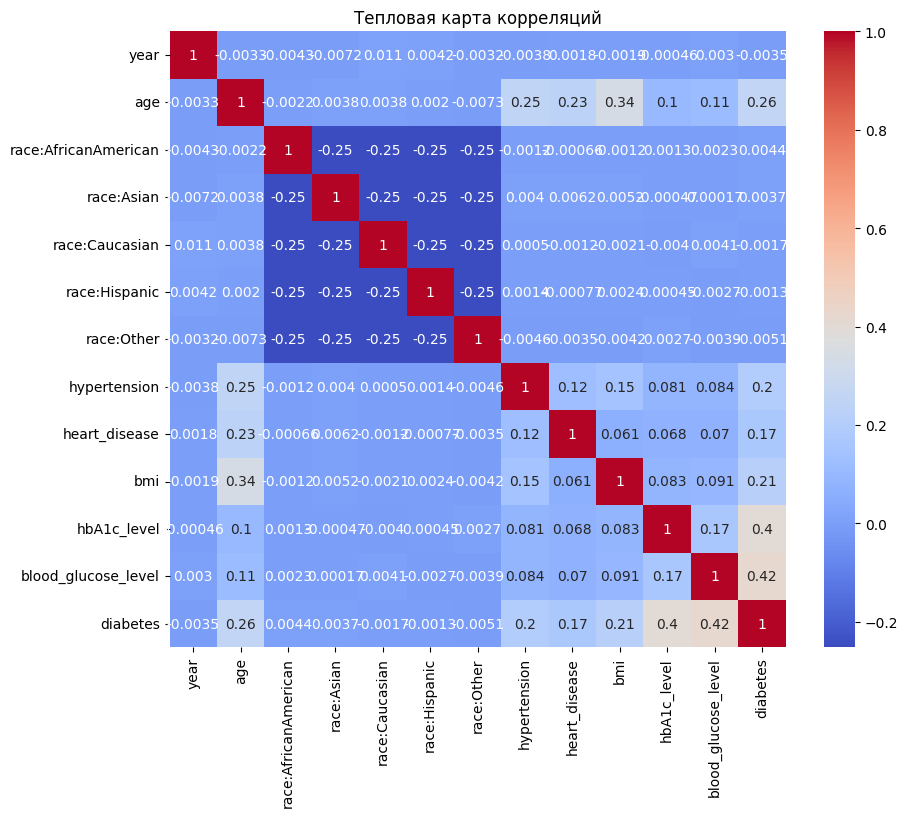

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла CSV
def load_data(filepath):
    return pd.read_csv(filepath)

# Визуализация тепловой карты
def plot_heatmap(data):
    # Выбираем числовые столбцы для анализа
    numeric_columns = data.select_dtypes(include=['float64', 'int64'])

    # Рассчитываем корреляционную матрицу
    correlation_matrix = numeric_columns.corr()

    # Создаем собственную цветовую карту
    custom_palette = sns.color_palette("coolwarm", as_cmap=True)

    # Строим тепловую карту
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap=custom_palette,
        cbar=True,
        square=True
    )
    plt.title("Тепловая карта корреляций")
    plt.show()

# Основной код
if __name__ == "__main__":
    # Укажите путь к вашему файлу CSV
    filepath = "diabetes_dataset.csv"  # Убедитесь, что файл загружен в Colab!

    # Загружаем данные
    data = load_data(filepath)

    # Отображаем первые строки данных
    print("Первые строки данных:")
    print(data.head())

    # Визуализируем тепловую карту
    plot_heatmap(data)


###Столбчатые диаграммы

<Axes: xlabel='hbA1c_level', ylabel='blood_glucose_level'>

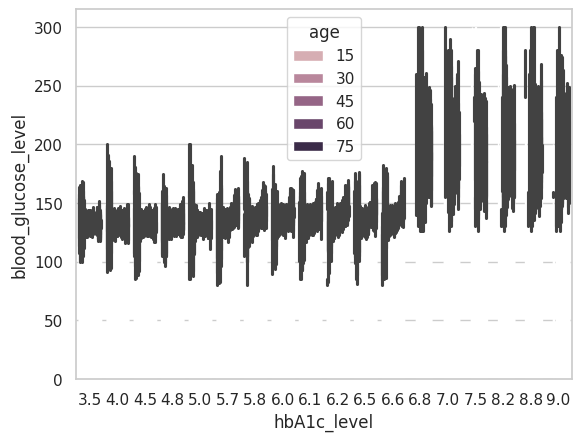

In [ ]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("diabetes_dataset.csv")
sns.set(style="whitegrid")
sns.barplot(x="hbA1c_level", y="blood_glucose_level", hue="age", data=data)

##Задание 2

В этом упражнении мы будем использовать сюжет приемной больницы для сравнения степени критичности состояния здоровья пациента. Вам будут предложены пять больных диабетом (указываемые номерами строк в датасете). Сравниваемые параметры hbA1c_level, blood_glucose_level, bmi и возраст пациентов. Небходимо оценить состояние здоровья пациента от 1 до 10.
Для каждой из характеристик и для итоговой оценки нужно построить графики включающие эти 5 пациентов.

1. Прочитайте данные расположенные в датасете.
2. Преобразуйте данные в удобный для использования формат для функции построения гистограммы Seaborn.
3. Использовать Seaborn для создания визуально привлекательного
графика баров, который сравнивает две оценки для всех пяти фильмов.


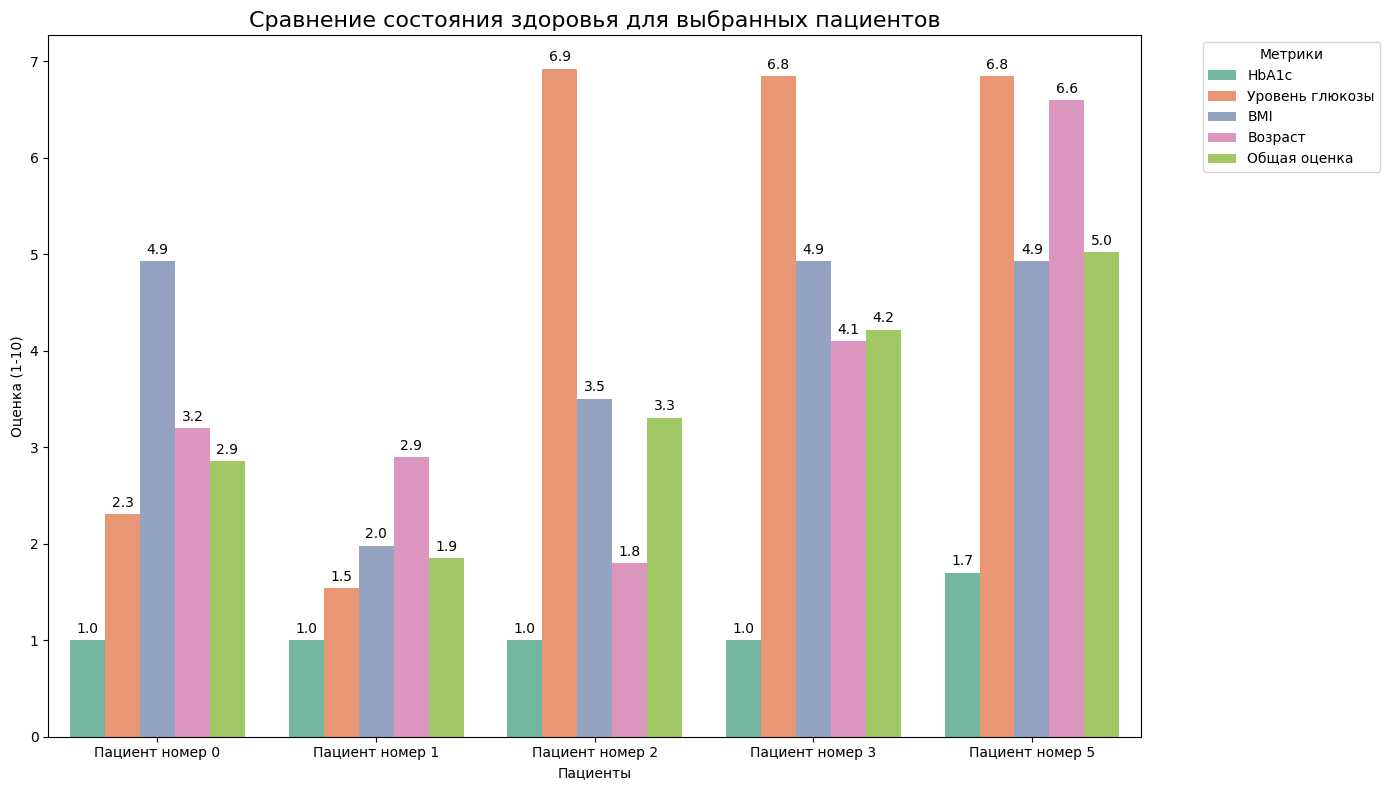

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для оценки состояния здоровья пациента (1-10)
def calculate_health_score(hbA1c, glucose, bmi, age):
    # Нормируем значения показателей в диапазон [1, 10]
    hbA1c_score = (hbA1c - 4) / (14 - 4) * 10
    glucose_score = (glucose - 70) / (200 - 70) * 10
    bmi_score = (bmi - 15) / (40 - 15) * 10
    age_score = age / 100 * 10

    # Ограничиваем значения от 1 до 10
    scores = [max(1, min(10, s)) for s in [hbA1c_score, glucose_score, bmi_score, age_score]]

    # Возвращаем индивидуальные оценки и среднюю итоговую
    overall_score = sum(scores) / 4
    return scores + [overall_score]

# Основной код
if __name__ == "__main__":
    # Укажите путь к вашему файлу CSV
    filepath = "diabetes_dataset.csv"  # Убедитесь, что файл загружен в Colab!

    # Загружаем данные
    data = pd.read_csv(filepath)

    # Выбираем пять пациентов по их номерам строк
    patient_ids = [0, 1, 2, 3, 5]  # Можно изменить номера строк
    patients = data.iloc[patient_ids]

    # Вычисляем оценки для каждого пациента
    results = []
    for index, row in patients.iterrows():
        scores = calculate_health_score(row["hbA1c_level"], row["blood_glucose_level"], row["bmi"], row["age"])
        results.append({
            "Пациент": f"Пациент номер {index}",
            "HbA1c": scores[0],
            "Уровень глюкозы": scores[1],
            "BMI": scores[2],
            "Возраст": scores[3],
            "Общая оценка": scores[4]
        })

    # Преобразуем результаты в DataFrame
    scores_df = pd.DataFrame(results)

    # Преобразуем в удобный формат для построения графиков
    melted_scores = scores_df.melt(id_vars="Пациент", var_name="Метрики", value_name="Оценка")

    # Построение гистограмм
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(data=melted_scores, x="Пациент", y="Оценка", hue="Метрики", palette="Set2")

    # Добавление численных значений над столбцами
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

    plt.title("Сравнение состояния здоровья для выбранных пациентов", fontsize=16)
    plt.ylabel("Оценка (1-10)")
    plt.xlabel("Пациенты")
    plt.legend(title="Метрики", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


1 означает наиболее здоровое состояние для этого показателя (норма или близко к ней).

10 означает наиболее тревожное состояние, указывающее на значительное отклонение от нормы.

##Доп. Задание

График линейной регрессии зависимости между уровнем BMI и Возрастом

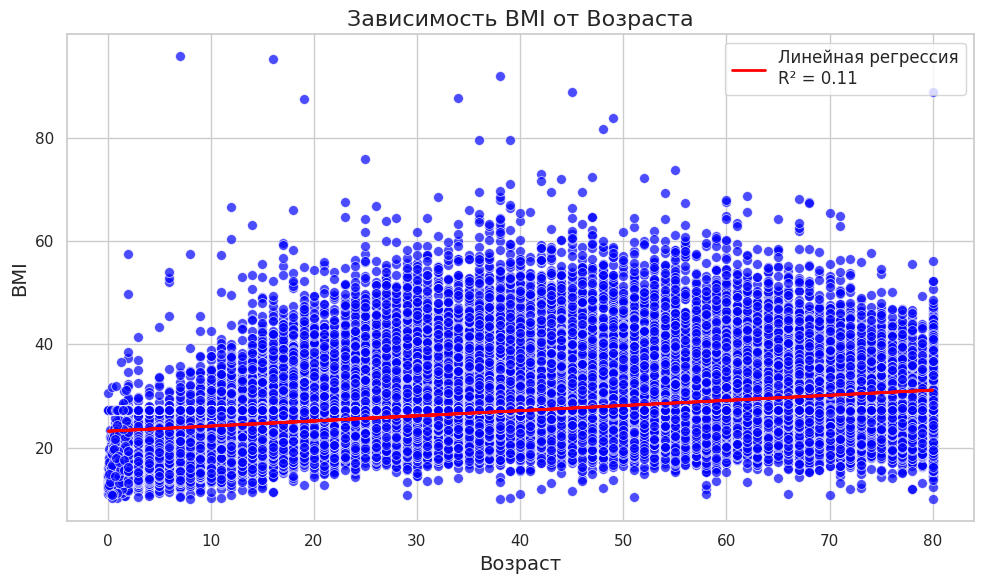

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Основной код
if __name__ == "__main__":
    # Укажите путь к вашему файлу CSV
    filepath = "diabetes_dataset.csv"  # Убедитесь, что файл загружен в Colab!

    # Загружаем данные
    data = pd.read_csv(filepath)

    # Построение точечного графика
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x="age", y="bmi", color="blue", s=50, alpha=0.7)
    plt.title("Зависимость BMI от Возраста", fontsize=16)
    plt.xlabel("Возраст", fontsize=14)
    plt.ylabel("BMI", fontsize=14)

    # Линейная регрессия с использованием scipy
    slope, intercept, r_value, p_value, std_err = linregress(data["age"], data["bmi"])
    regression_line = slope * data["age"] + intercept

    # Нанесение линии регрессии на график
    plt.plot(data["age"], regression_line, color="red", linewidth=2, label=f"Линейная регрессия\nR² = {r_value**2:.2f}")
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


Полиномиальная регрессия

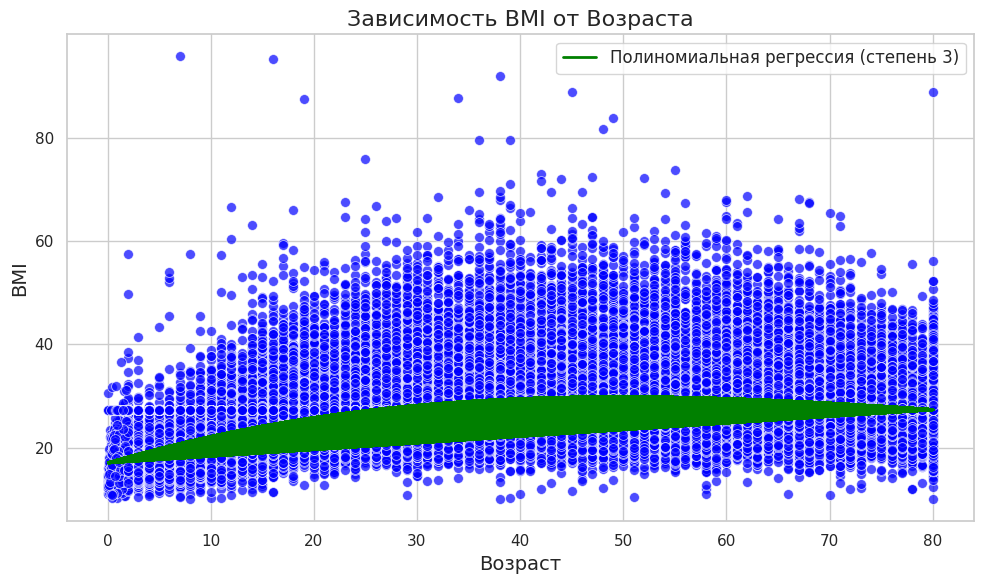

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Основной код
if __name__ == "__main__":
    # Укажите путь к вашему файлу CSV
    filepath = "diabetes_dataset.csv"  # Убедитесь, что файл загружен в Colab!

    # Загружаем данные
    data = pd.read_csv(filepath)

    # Построение точечного графика
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x="age", y="bmi", color="blue", s=50, alpha=0.7)
    plt.title("Зависимость BMI от Возраста", fontsize=16)
    plt.xlabel("Возраст", fontsize=14)
    plt.ylabel("BMI", fontsize=14)


    # Полиномиальная регрессия (степень 3)
    poly_coeffs = np.polyfit(data["age"], data["bmi"], 3)  # Коэффициенты полинома второй степени
    poly_fit_line = np.polyval(poly_coeffs, data["age"])  # Вычисляем значения по полиному
    plt.plot(data["age"], poly_fit_line, color="green", linewidth=2, label="Полиномиальная регрессия (степень 3)")

    # Легенда и оформление графика
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


###Squarify

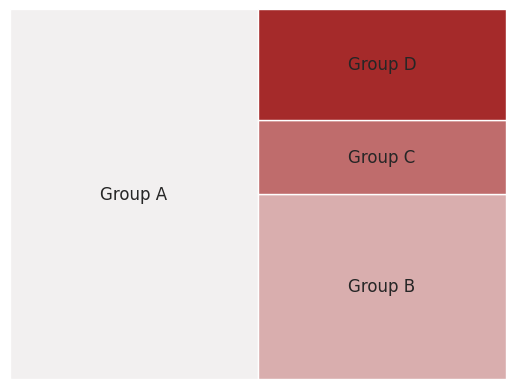

In [ ]:
!pip install squarify


import matplotlib.pyplot as plt
import seaborn as sns
import squarify
colors = sns.light_palette("brown", 4)
squarify.plot(sizes=[50, 25, 10, 15], label=["Group A", "Group B", "Group C", "Group D"], color=colors)
plt.axis("off")
plt.show()

##Задание для самостоятельной работы №3

В этом упражнении мы будем использовать карту-дерево (squarify) для
визуализации процентного соотношения больных диабетом, и их показателями:
1. C помощью pandas считывать данные, расположенные в датасете.
2. Использовать карту дерева для визуализации состояния здоровья пациентов.
3. Показывать проценты для каждой плитки и добавлять заголовок.

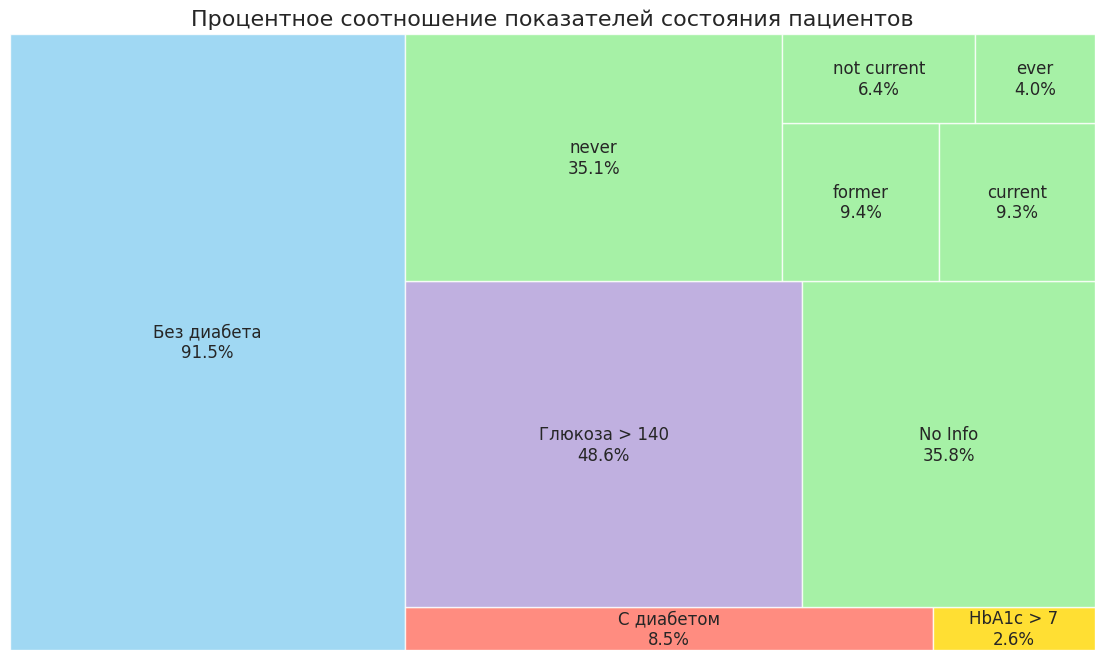

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Основной код
if __name__ == "__main__":
    # Укажите путь к вашему файлу CSV
    filepath = "diabetes_dataset.csv"  # Убедитесь, что файл загружен в Colab!

    # Загружаем данные
    data = pd.read_csv(filepath)

    # Создание категорий
    diabetes_counts = data['diabetes'].value_counts(normalize=True) * 100
    high_hba1c = (data['hbA1c_level'] > 7).sum() / len(data) * 100
    high_glucose = (data['blood_glucose_level'] > 140).sum() / len(data) * 100
    smoking_stages = data['smoking_history'].value_counts(normalize=True) * 100

    # Подготовка данных для карты-дерева
    labels = [
        f"Без диабета\n{diabetes_counts.get(0, 0):.1f}%",
        f"С диабетом\n{diabetes_counts.get(1, 0):.1f}%",
        f"HbA1c > 7\n{high_hba1c:.1f}%",
        f"Глюкоза > 140\n{high_glucose:.1f}%"
    ]
    sizes = [
        diabetes_counts.get(0, 0),
        diabetes_counts.get(1, 0),
        high_hba1c,
        high_glucose
    ]
    colors = ["#89CFF0", "#FF6F61", "#FFD700", "#B19CD9"]

    # Добавление стадий курения
    for stage, percentage in smoking_stages.items():
        labels.append(f"{stage}\n{percentage:.1f}%")
        sizes.append(percentage)
        colors.append("#90EE90")  # Светло-зелёный для курения

    # Построение карты-дерева
    plt.figure(figsize=(14, 8))
    squarify.plot(
        sizes=sizes,
        label=labels,
        color=colors,
        alpha=0.8
    )
    plt.axis('off')  # Убираем оси
    plt.title("Процентное соотношение показателей состояния пациентов", fontsize=16)
    plt.show()
